In [2]:
#EDA_1.ipynb
import pandas as pd

# Cargar archivos CSV
file_paths = ["../dataset/2015.csv", "../dataset/2016.csv", "../dataset/2017.csv", "../dataset/2018.csv", "../dataset/2019.csv"]
data_frames = [pd.read_csv(file) for file in file_paths]

In [3]:
# Renombrar columnas y unificar datasets
for i, df in enumerate(data_frames):
    year = 2015 + i
    df['Year'] = year
    if year == 2015:
        df.columns = ["Country", "Region", "Happiness Rank", "Happiness Score", "Standard Error",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"]
    elif year == 2016:
        df.columns = ["Country", "Region", "Happiness Rank", "Happiness Score",
                      "Lower Confidence Interval", "Upper Confidence Interval",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"]
    elif year == 2017:
        print(df.head)
        df.columns = ["Country", "Happiness Rank", "Happiness Score", "Whisker High", "Whisker Low",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Generosity", "Trust (Government Corruption)", "Dystopia Residual", "Year"]
    elif year in [2018, 2019]:
        df.columns = ["Happiness Rank", "Country", "Happiness Score", "Economy (GDP per Capita)", 
                      "Family", "Health (Life Expectancy)", "Freedom", "Generosity", 
                      "Trust (Government Corruption)", "Year"]

combined_data = pd.concat(data_frames, ignore_index=True, sort=False)

# Imputar valores nulos en "Dystopia Residual" y "Trust (Government Corruption)"
combined_data["Dystopia Residual"] = combined_data["Dystopia Residual"].fillna(combined_data["Dystopia Residual"].median())
combined_data["Trust (Government Corruption)"] = combined_data["Trust (Government Corruption)"].fillna(combined_data["Trust (Government Corruption)"].median())



<bound method NDFrame.head of                       Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whis

In [4]:
# Resumen estadístico
print(combined_data.describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      782.000000       782.000000      158.000000   
mean        78.698210         5.379018        0.047885   
std         45.182384         1.127456        0.017146   
min          1.000000         2.693000        0.018480   
25%         40.000000         4.509750        0.037268   
50%         79.000000         5.322000        0.043940   
75%        118.000000         6.189500        0.052300   
max        158.000000         7.769000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                782.000000  782.000000                782.000000   
mean                   0.916047    1.078392                  0.612416   
std                    0.407340    0.329548                  0.248309   
min                    0.000000    0.000000                  0.000000   
25%                    0.606500    0.869363                  0.440183   
50%                    0.982205    1.12

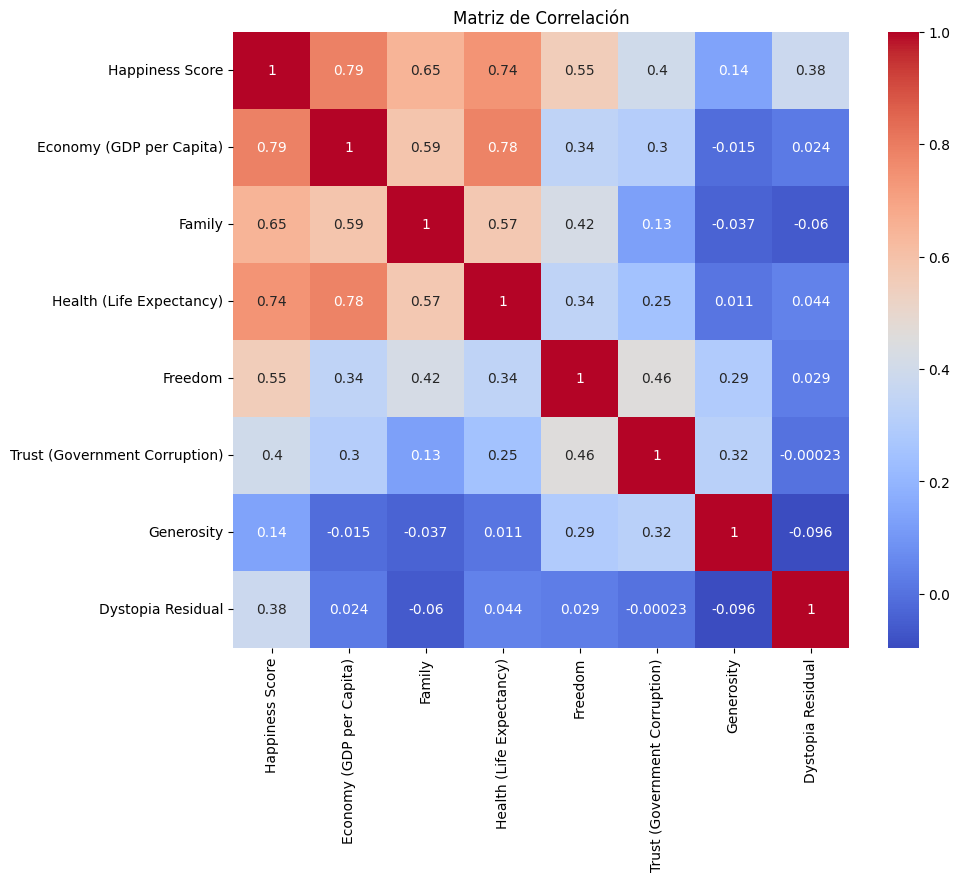

In [5]:
# Correlación entre características
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = combined_data[["Happiness Score", "Economy (GDP per Capita)", "Family",
                                    "Health (Life Expectancy)", "Freedom",
                                    "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()


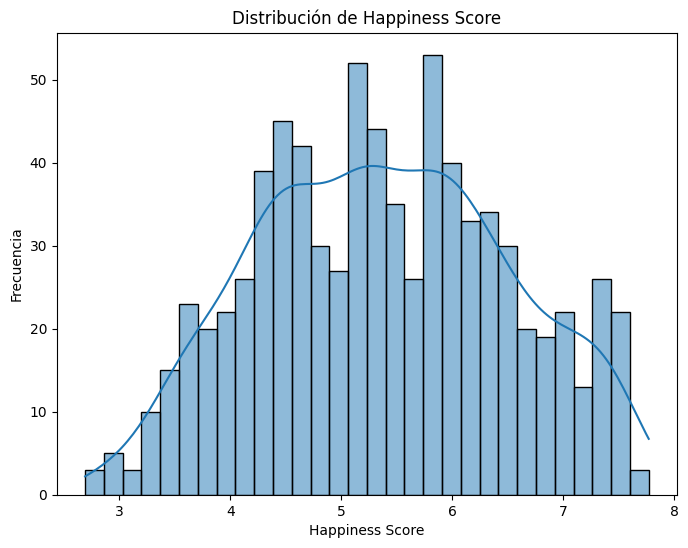

In [6]:
# Distribución de la variable objetivo "Happiness Score"
plt.figure(figsize=(8, 6))
sns.histplot(combined_data["Happiness Score"], bins=30, kde=True)
plt.title("Distribución de Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frecuencia")
plt.show()

In [7]:

# Borra columnas con valores nulos en el DataFrame
combined_data.drop(columns=["Region", "Standard Error","Lower Confidence Interval","Upper Confidence Interval","Whisker High","Whisker Low"], inplace=True)


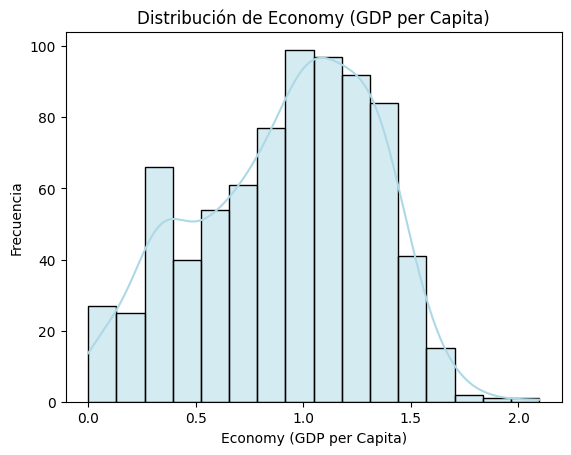

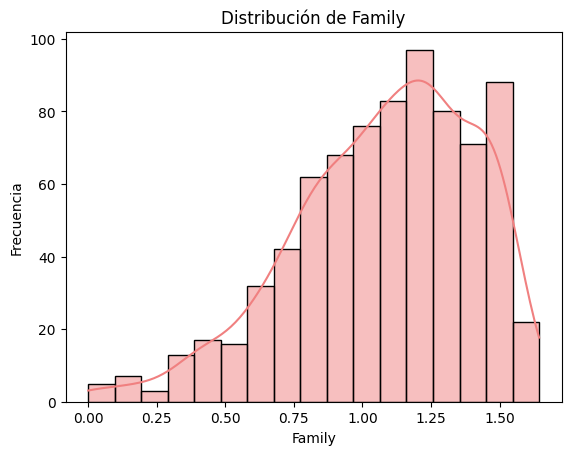

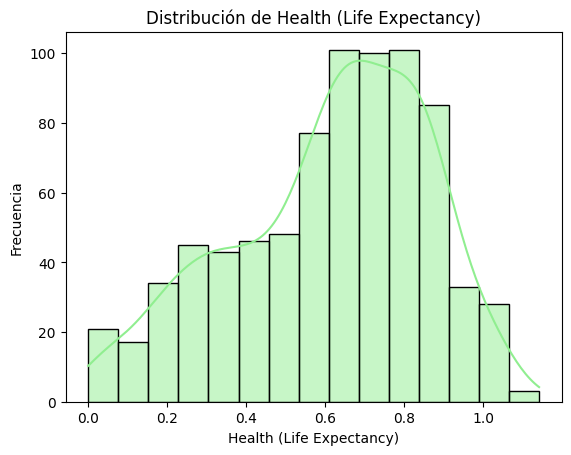

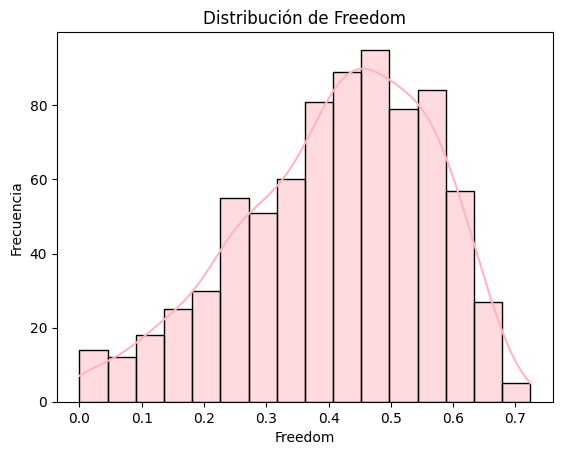

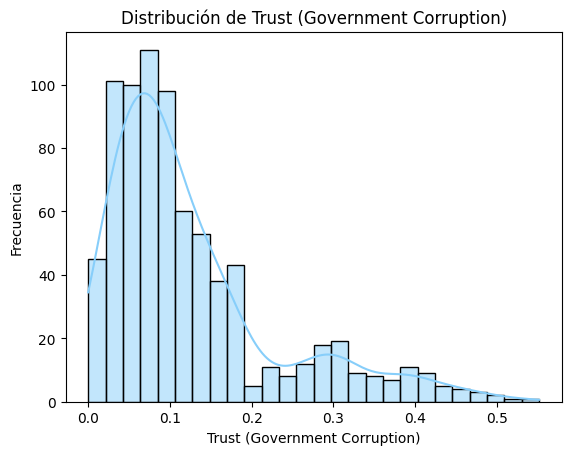

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Definir colores pastel para cada variable
colors = {
    'Economy (GDP per Capita)': 'lightblue',
    'Family': 'lightcoral',
    'Health (Life Expectancy)': 'lightgreen',
    'Freedom': 'lightpink',
    'Trust (Government Corruption)': 'lightskyblue'
}

# Variables clave a analizar
variables = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']

# Graficar la distribución para cada variable clave con colores pastel
for var in variables:
    plt.figure()
    sns.histplot(combined_data[var], kde=True, color=colors[var])
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


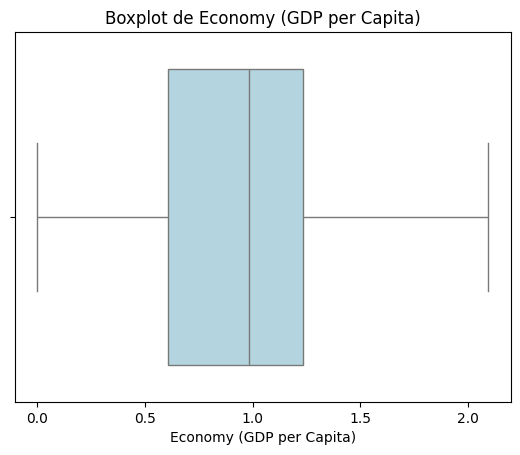

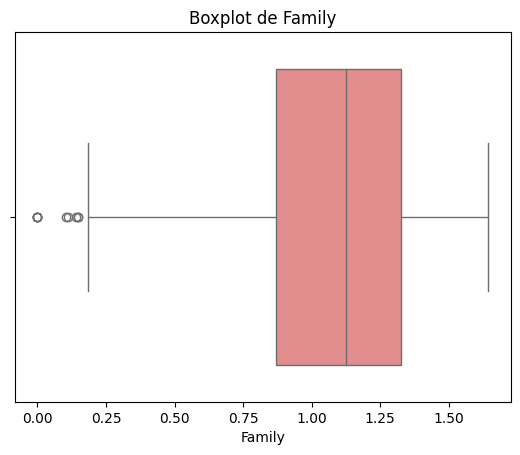

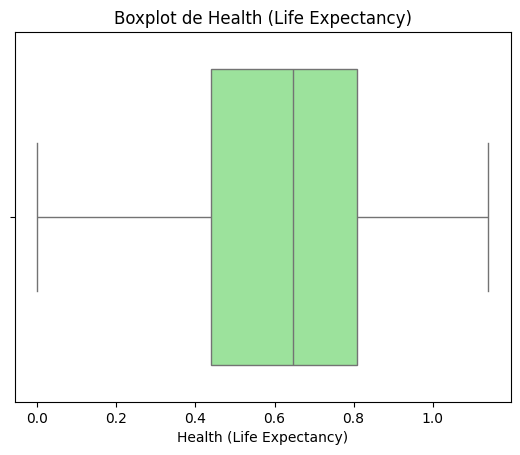

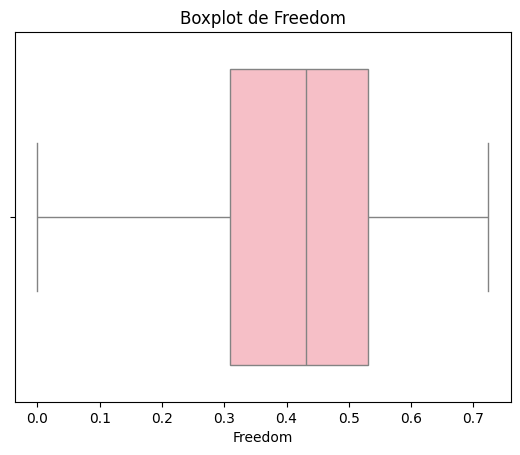

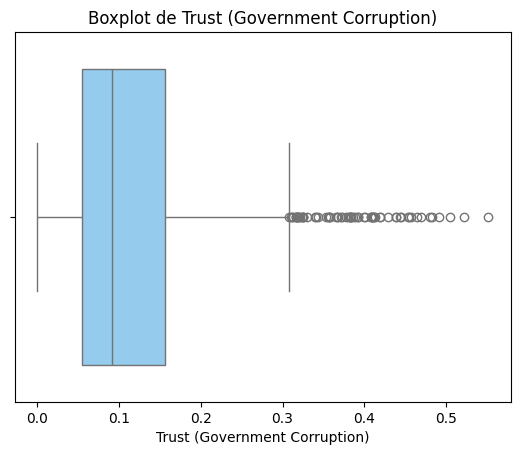

In [20]:
# Definir los colores pastel para cada variable
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables y colores
variables = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightskyblue']

# Crear boxplots para cada variable con un color diferente
for var, color in zip(variables, colors):
    plt.figure()
    sns.boxplot(x=combined_data[var], color=color)
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()


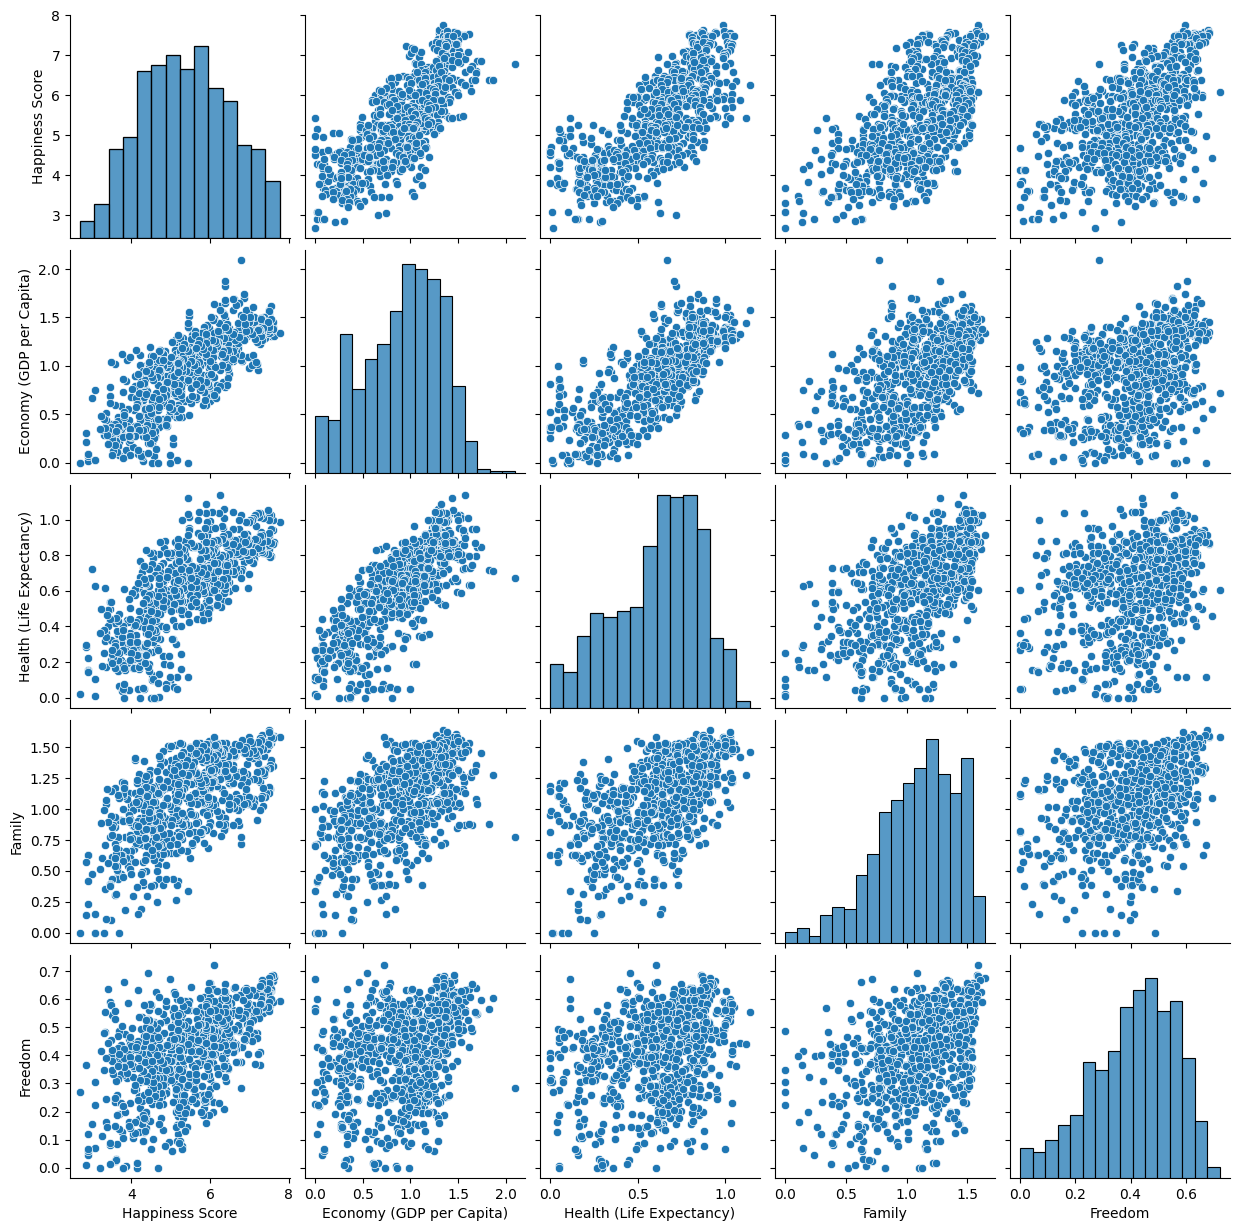

In [15]:
sns.pairplot(combined_data[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family', 'Freedom']])
plt.show()


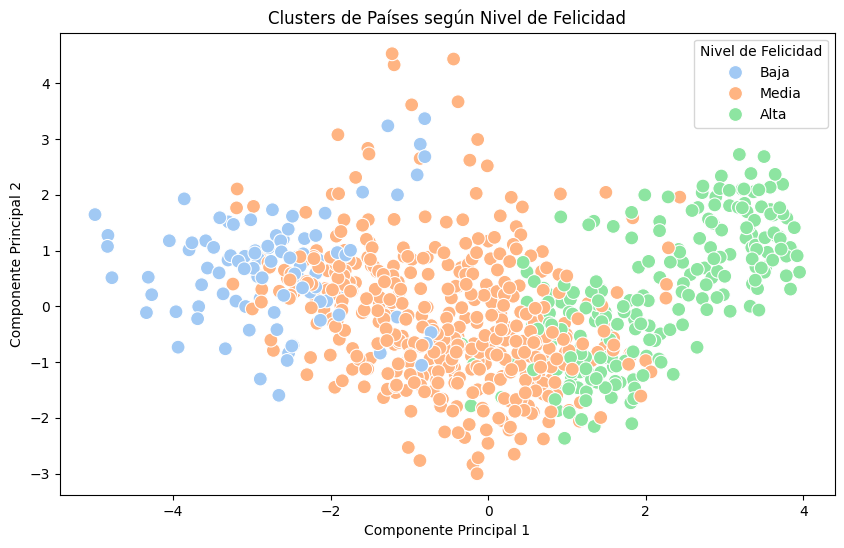

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Crear categorías basadas en Happiness Score
combined_data['Happiness Level'] = pd.cut(combined_data['Happiness Score'], bins=[0, 4, 6, 8], labels=['Baja', 'Media', 'Alta'])

# Seleccionar las variables relevantes para clustering
cluster_data = combined_data[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                     'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
                     'Generosity']]

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Añadir los componentes principales al DataFrame
combined_data['PCA1'] = pca_components[:, 0]
combined_data['PCA2'] = pca_components[:, 1]

# Graficar los clusters usando los niveles de felicidad como etiquetas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Happiness Level', data=combined_data, palette='pastel', s=100, edgecolor="w")
plt.title('Clusters de Países según Nivel de Felicidad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Nivel de Felicidad')
plt.show()


C:\Users\tinaq\AppData\Local\Temp\ipykernel_17220\2021487102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top_10_happy, palette='Blues')


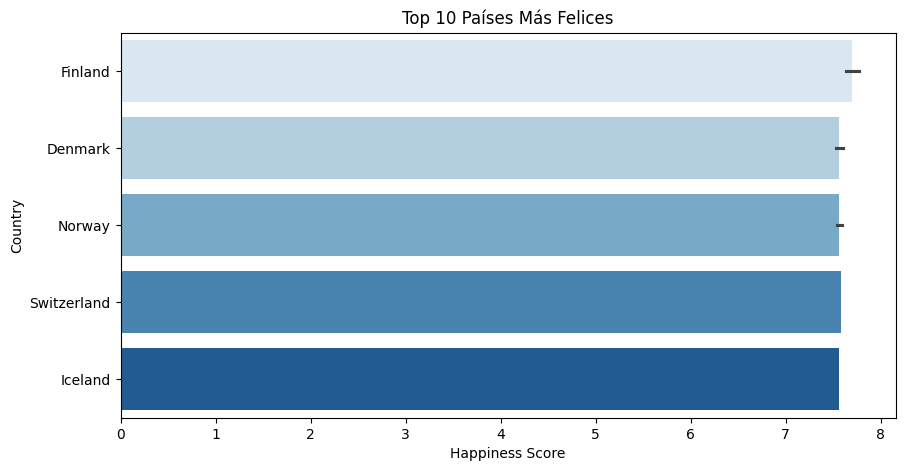

C:\Users\tinaq\AppData\Local\Temp\ipykernel_17220\2021487102.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top_10_unhappy, palette='Reds')


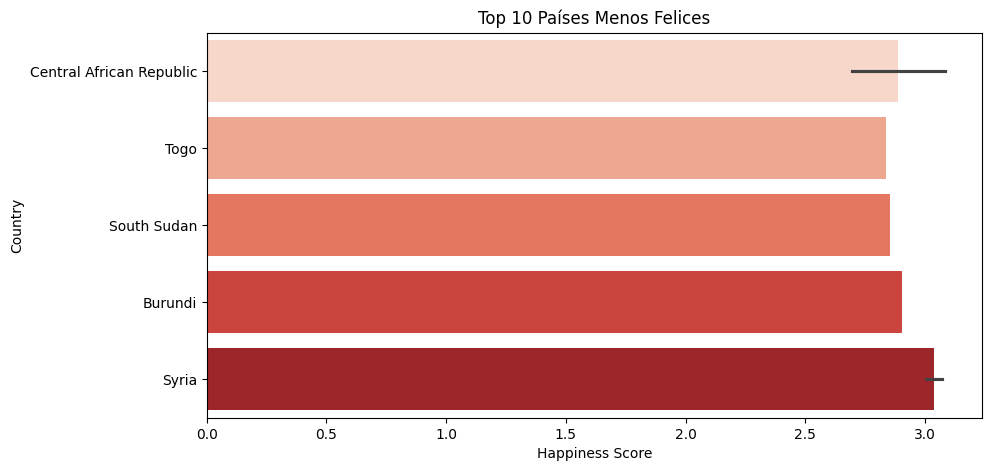

In [17]:
# Top 10 países más felices
top_10_happy = combined_data.nlargest(10, 'Happiness Score')
top_10_unhappy = combined_data.nsmallest(10, 'Happiness Score')

plt.figure(figsize=(10, 5))
sns.barplot(x='Happiness Score', y='Country', data=top_10_happy, palette='Blues')
plt.title('Top 10 Países Más Felices')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Happiness Score', y='Country', data=top_10_unhappy, palette='Reds')
plt.title('Top 10 Países Menos Felices')
plt.show()


In [7]:
# Guardar el dataset limpio
combined_data.to_csv("../dataset/cleaned_data.csv", index=False)
print("Dataset combinado, valores nulos imputados, y guardado.")

Dataset combinado, valores nulos imputados, y guardado.


In [8]:
combined_data.head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015
